# 3 Arm Foraging maze

In [1]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt

In [2]:
colors=('xkcd:water blue','xkcd:scarlet','xkcd:mango')#,'xkcd:grass green')

with open('dfSessList.pkl','rb') as fname:
    dfSessList=pickle.load(fname)
    
with open('dfVI.pkl','rb') as fname:
    dfVI=pickle.load(fname)
    
with open('dfLing.pkl','rb') as fname:
    dfLing=pickle.load(fname)
    
with open('dfTince.pkl','rb') as fname:
    dfTince=pickle.load(fname)
    
listSubj=np.array(list(set(dfVI.subj)))
listSubj.sort()


<img src="W71_0745.JPG" alt="3 Arm Foraging maze" title="3 Arm Foraging maze" />

<img src="W71_0731.JPG" alt="3 Arm Foraging maze - poke close-up" title="3 Arm Foraging maze - poke close-up" />

We trained rats on a number of related foraging tasks on the 3-arm maze depicted above. Arms are 20 inches long, 120º apart from each other, and each are equipped with floor lights and a nose-port at the end. Floor lights were used as cues, and nose-ports were used to register nose-poke responses and deliver water rewards according to different contingencies described below.

## 1. Dynamic Bandit
(concurrent variable interval schedules)

In this task variant the first response at each of the three arms was rewarded. After that, a new response at arm $k$ was rewarded as long as more than $X_k$ seconds had elapsed since last rewarded response at the same arm, where $X_k \sim Exp(\lambda_k)$. Values of $\lambda$ were set anew at the beginning of each session by sampling randomly without replacement from the set $\{30^{-1},60^{-1},120^{-1}\}$. Since $E[X_k]=\lambda_k^{-1}$, average intervals at arms $A=\{0,1,2\}$ were a random permutation of $I=\{30, 60, 120\}$ seconds. For a given arm $k$, a new $X_k$ was sampled after each reward event.

In other words, this is a probabilistic 3-armed bandit task where probability of reward grows monotonically with time since last response at the same arm. Specifically, responding at arm $k$ at time $t_k$ was rewarded with probability $F_{X_k}(t_k) = 1 - e^{-\lambda_k t_k}$ (i.e. the CDF of $Exp(\lambda_k)$ evaluated at $t_k$).

### Results

In [3]:
display(dfSessList)

IRI    VI   cued  deplete  dur  meanA  meanB  meanC  rewSize
subj  date                                                                  
TG023 20180621    1  True  False    False   66     60     30    120       40
      20180622    1  True  False    False   59     60     30    120       40
      20180625    1  True  False    False   64     60     30    120       40
      20180626    1  True  False    False   53     60    120     30       40
      20180627    1  True  False    False   56     60     30    120       40
      20180628    1  True  False    False   52    120     60     30       40
      20180629    1  True  False    False   62    120     30     60       40
TG024 20180621    1  True  False    False   55    120     30     60       40
      20180622    1  True  False    False   53    120     60     30       40
      20180625    1  True  False    False   52     60     30    120       40
      20180626    1  True  False    False   49     30     60    120       40
      20180627    1  True  False    False   51    120     30     60       40
      20180628    1  True  False    False   60    120     30     60       40
      20180629    1  True  False    False   55     30     60    120       40
TG025 20180620    1  True  False    False   50    120     60     30       40
      20180621    1  True  False    False   68     60    120     30       40
      20180622    1  True  False    False   74    120     30     60       40
      20180625    1  True  False    False   61     30    120     60       40
      20180626    1  True  False    False   45    120     60     30       40
      20180627    1  True  False    False   52     30    120     60       40
      20180628    1  True  False    False   52     30    120     60       40
      20180629    1  True  False    False   43     60     30    120       40
TG026 20180620    1  True  False    False   56    120     30     60       40
      20180621    1  True  False    False   72     30    120     60       40
      20180622    1  True  False    False   46    120     60     30       40
      20180625    1  True  False    False   53     30     60    120       40
      20180626    1  True  False    False   48     60    120     30       40
      20180627    1  True  False    False   49    120     60     30       40
      20180628    1  True  False    False   67    120     60     30       40
      20180629    1  True  False    False   52     30    120     60       40

**Table 1.1** List of all sessions included in current analyses. n = 4 subjects, 7-8 sessions each. Session duration in minutes, mean interval for each arm in seconds, reward magnitude in microliters.

In [4]:
dfVI.sample(15).sort_index().iloc[:,[0,1,3,2,4]]

,subj,date,interval,armNo,armVal
ndx,,,,,
56,TG023,20180621,169.6608,0,1
100,TG023,20180621,12.2579,1,0
178,TG023,20180621,81.3149,1,0
445,TG023,20180625,47.3247,1,0
1177,TG024,20180621,18.2357,2,0
1292,TG024,20180622,30.2707,0,2
1619,TG024,20180626,30.3530,1,1
2409,TG025,20180621,85.5144,2,1
2681,TG025,20180622,43.5482,2,0


**Table 1.2** Sample data from table of intervals. *Interval* is time elapsed between a rewarded response and the time when another reward is made available at the same arm.  *armNo* identifies physical arm ($k$). *armVal* identifies ranked value of $\lambda_k$ assigned to arm $k$ on a given session.

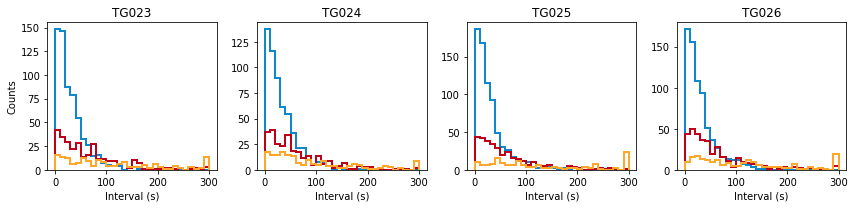

In [5]:
hf, ha = plt.subplots(1,len(listSubj),figsize=(12,3))#,sharex=True,sharey=True)
ha[0].set_ylabel('Counts')
for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    
    dfVI_subj=dfVI[dfVI['subj']==nameSubj]
    
    listSess=np.array(list(set(dfVI_subj['date'])))
    listSess.sort()
    
    ha[iSubj].set_xlabel('Interval (s)')
    ha[iSubj].set_title(nameSubj)

    for iArm in set(dfVI_subj['armVal']):
        
        dfVI_arm=dfVI_subj[dfVI_subj['armVal']==iArm]
        x=dfVI_arm.interval
        x=x.clip(0,300)
        ha[iSubj].hist(x,bins=np.linspace(0,300,31),cumulative=False,density=False,histtype='step',color=colors[iArm],lw=2)
                
plt.tight_layout()

**Figure 1.1** Histograms of interval between rewarded response and next reward availability, pooled over sessions within arms of same $\lambda_k$. This is a sanity-check MC reconstruction of $Exp(\lambda_k)$.

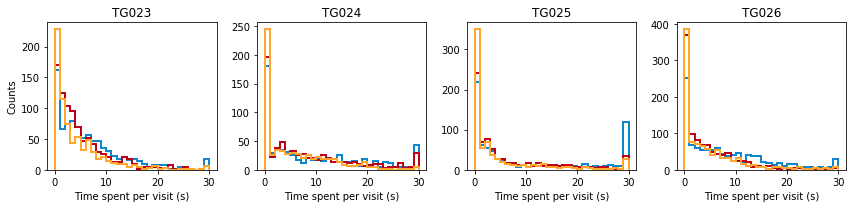

In [6]:
hf, ha = plt.subplots(1,len(listSubj),figsize=(12,3))#,sharex=True,sharey=True)
ha[0].set_ylabel('Counts')
for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    
    dfLing_subj=dfLing[dfLing['subj']==nameSubj]
    
    listSess=np.array(list(set(dfLing_subj['date'])))
    listSess.sort()
    
    ha[iSubj].set_xlabel('Time spent per visit (s)')
    ha[iSubj].set_title(nameSubj)
    
    listArmVal=np.array(list(set(dfLing_subj['armVal'])))
    listArmVal.sort()

    for iArm in range(len(listArmVal)):
        
        dfLing_arm=dfLing_subj[dfLing_subj['armVal']==listArmVal[iArm]]
        x=dfLing_arm.lingert
        x=x.clip(0,30)
        ha[iSubj].hist(x,bins=np.linspace(0,30,31),cumulative=False,density=False,histtype='step',color=colors[iArm],lw=2)
                
plt.tight_layout()

**Figure 1.2** Histogram of time spent at an arm per visit (computed from time difference between first and last response, __[clipped](https://docs.scipy.org/doc/numpy/reference/generated/numpy.clip.html)__ at 30s for display purposes), pooled over sessions within arms of same $\lambda_k$.

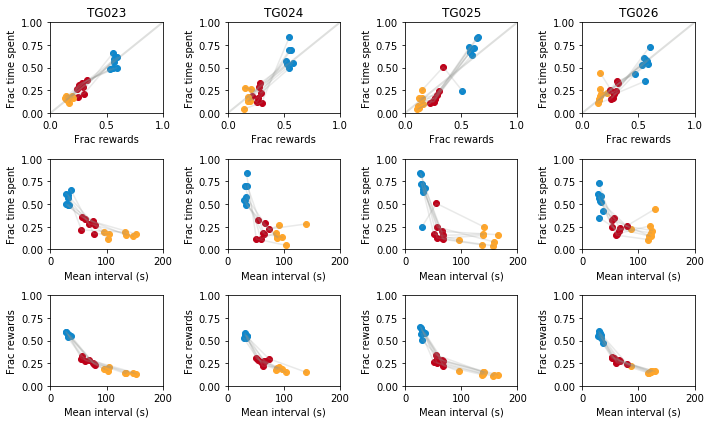

In [7]:
hf, ha = plt.subplots(3,len(listSubj),figsize=(10,6))#,sharex=True,sharey=True)

for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    
    dfVI_subj=dfVI[dfVI['subj']==nameSubj]
    dfLing_subj=dfLing[dfLing['subj']==nameSubj]
    
    listSess=np.array(list(set(dfVI_subj['date'])))
    listSess.sort()
    
    ha[0,iSubj].plot([0,1],[0,1],c='xkcd:gray',lw=2, alpha=.3)
    
#     print(nameSubj,listSess)
        
    for iSess in range(len(listSess)):
        dfVI_sess=dfVI_subj[dfVI_subj['date']==listSess[iSess]]
        dfLing_sess=dfLing_subj[dfLing_subj['date']==listSess[iSess]]
        
        mu=np.full(3,np.nan)
        sigma=np.full(3,np.nan)
        fracTime=np.full(3,np.nan)
        fracRew=np.full(3,np.nan)
        
        for iArm in set(dfVI_sess['armNo']):
            dfVI_arm=dfVI_sess[dfVI_sess['armNo']==iArm]
            dfLing_arm=dfLing_sess[dfLing_sess['armNo']==iArm]
            
            mu[iArm]=dfVI_arm['interval'].mean()
            sigma[iArm]=dfVI_arm['interval'].std()
            fracTime[iArm]=dfLing_arm['lingert'].sum()/dfLing_sess['lingert'].sum()
            fracRew[iArm]=dfLing_arm['nRew'].sum()/dfLing_sess['nRew'].sum()
        
        ha[0,iSubj].plot(np.sort(fracRew),fracTime[np.argsort(fracRew)],c='xkcd:gray',alpha=.2)
        ha[1,iSubj].plot(np.sort(mu),fracTime[np.argsort(mu)],c='xkcd:gray',alpha=.2)
        ha[2,iSubj].plot(np.sort(mu),fracRew[np.argsort(mu)],c='xkcd:gray',alpha=.2)
        
        for iArm in set(dfVI_sess['armNo']):
            dfVI_arm=dfVI_sess[dfVI_sess['armNo']==iArm]
            dfLing_arm=dfLing_sess[dfLing_sess['armNo']==iArm]
            color=colors[np.arange(3)[mu[iArm]==sorted(mu)].item()]
        
            ha[0,iSubj].scatter(fracRew[iArm],fracTime[iArm],c=color)

            ha[1,iSubj].scatter(mu[iArm],fracTime[iArm],c=color)
            
            ha[2,iSubj].scatter(mu[iArm],fracRew[iArm],c=color)
            
    ha[0,iSubj].set_title(nameSubj)
    ha[0,iSubj].set_xlabel('Frac rewards')
    ha[0,iSubj].set_ylabel('Frac time spent')
    ha[0,iSubj].set_xlim(0,1)
    ha[0,iSubj].set_ylim(0,1)
    
    ha[1,iSubj].set_xlabel('Mean interval (s)')
    ha[1,iSubj].set_ylabel('Frac time spent')
    ha[1,iSubj].set_xlim(0,200)
    ha[1,iSubj].set_ylim(0,1)
    
    ha[2,iSubj].set_xlabel('Mean interval (s)')
    ha[2,iSubj].set_ylabel('Frac rewards')
    ha[2,iSubj].set_xlim(0,200)
    ha[2,iSubj].set_ylim(0,1)

plt.tight_layout()

**Figure 1.3** Each set of 3 linked points is one session.
(top) Fraction of total time spent in an arm (measured from time difference between first and last poke response) vs fraction of rewards obtained for each arm. Behavior generally adheres to Matching law.
(mid) Fraction of total time spent vs average interval --- i.e. empirical $E [X_k ] $ --- for each arm.
(bottom) Fraction of rewards vs average interval for each arm.

### To do

 - Test whether animals keep track of time-varying $P(reward)$ at other arms.

    - Null hypothesis: choices of when to leave an arm (time spent) and what arm to visit depend on arm value ($\lambda$), but not on time since last reward at each of three arms.
    - In other words, behavior is explained by random, independent samples from distributions represented in figures 1.1 and 1.2.
    
- Manipulate effort


In [8]:
dfTince.sample(5).sort_index().iloc[:,[0,1,2,3,7,4,5,6]]

,subj,date,arm,nextarm,travel,tinceR0,tinceR1,tinceR2
169,TG023,20180621,1,0,2.3384,178.9223,118.4200,28.2117
433,TG023,20180621,1,2,4.4321,42.9824,0.0657,116.6294
509,TG023,20180621,0,1,4.4137,184.9234,11.5450,7.0202
5557,TG025,20180622,2,0,2.0939,75.0938,124.1031,67.1358
9280,TG026,20180628,2,1,8.2510,89.6508,4.6456,21.1880


**Table 1.3** Sample data from table of leaving decisions - ie last response of a sequence. After emitting a response at *arm*, animals moved on to *nextarm*, and travel time (s) is indicated in *travel*. Arms are identified by their values of $\lambda_k$ and not by their physical location, meaning nubmers are comparable across sessions. *tinceRk* is time elapsed since last reward at arm $k$ and the current response.

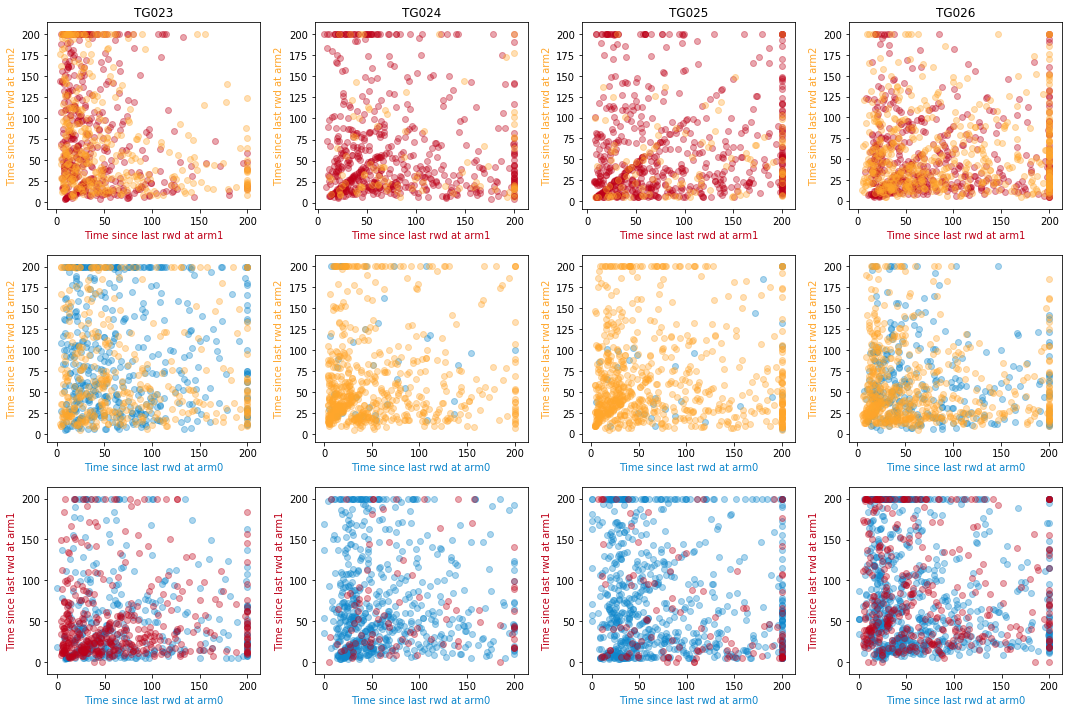

In [50]:
hf, ha = plt.subplots(3,len(listSubj),figsize=(15,10))#,sharex=True,sharey=True)

for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    ndxSubj=dfTince.subj==nameSubj
    ha[0,iSubj].set_title(nameSubj)
    for iArm in list(set(dfTince[ndxSubj].arm)):
        ndxArm=np.logical_and(dfTince.arm==iArm,ndxSubj)
        listArmJ=list(set(dfTince[ndxArm].nextarm))
        for jArm in listArmJ:
            ndxArmJ=np.logical_and(dfTince.nextarm==jArm,ndxArm)
            x=dfTince[ndxArmJ]['tinceR'+str(listArmJ[0])]
            y=dfTince[ndxArmJ]['tinceR'+str(listArmJ[1])]
            
            x=np.clip(x,0,200)
            y=np.clip(y,0,200)
            
#             x=np.sqrt(x)
#             y=np.sqrt(y)
            
#             x=np.log(x)
#             y=np.log(y)
            
            ha[iArm,iSubj].scatter(x,y,c=colors[jArm],alpha=0.35)
            ha[iArm,iSubj].set_xlabel('Time since last rwd at arm' + str(listArmJ[0]))
            ha[iArm,iSubj].set_ylabel('Time since last rwd at arm' + str(listArmJ[1]))
            ha[iArm,iSubj].xaxis.label.set_color(colors[listArmJ[0]])
            ha[iArm,iSubj].yaxis.label.set_color(colors[listArmJ[1]])
            
plt.tight_layout()

**Figure 1.4** Abscissa and ordinate denote time (clipped at 200s) elapsed since last reward at distant arms at the moment of disengaging from current arm. Marker color indicates what arm was visited next.

$1 - e^{-\lambda_k t_k}$

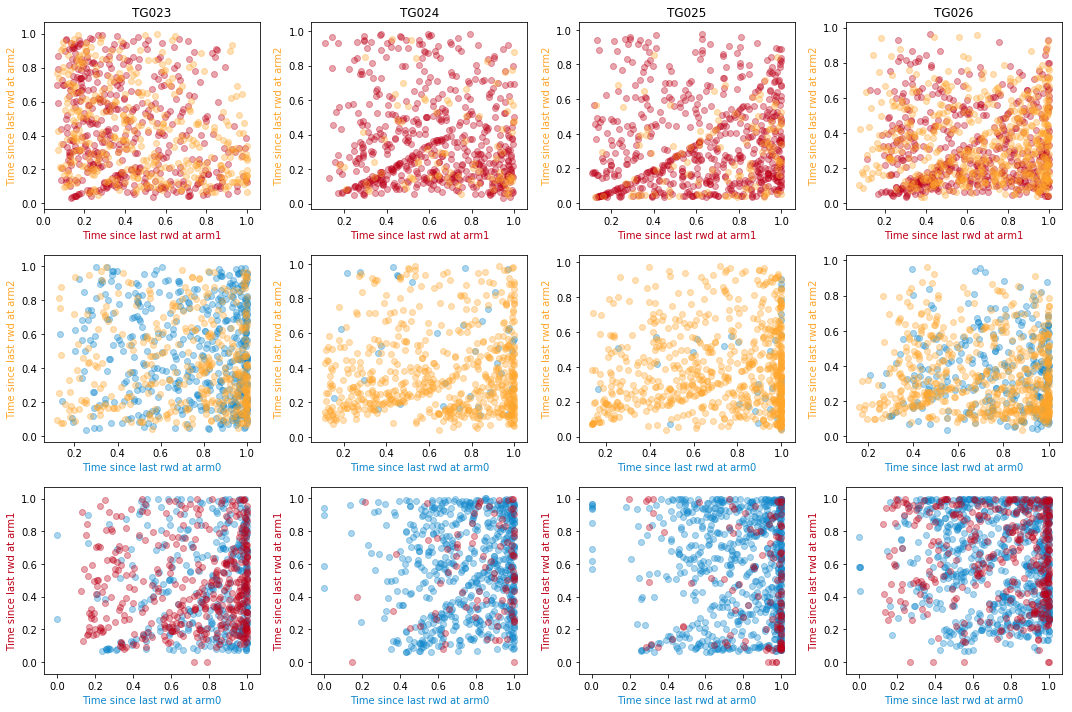

In [54]:
lambdas=[1./30,1./60,1./120]
hf, ha = plt.subplots(3,len(listSubj),figsize=(15,10))#,sharex=True,sharey=True)

for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    ndxSubj=dfTince.subj==nameSubj
    ha[0,iSubj].set_title(nameSubj)
    for iArm in list(set(dfTince[ndxSubj].arm)):
        ndxArm=np.logical_and(dfTince.arm==iArm,ndxSubj)
        listArmJ=list(set(dfTince[ndxArm].nextarm))
        for jArm in listArmJ:
            ndxArmJ=np.logical_and(dfTince.nextarm==jArm,ndxArm)
            x=dfTince[ndxArmJ]['tinceR'+str(listArmJ[0])]
            y=dfTince[ndxArmJ]['tinceR'+str(listArmJ[1])]
            
#             x=np.clip(x,0,200)
#             y=np.clip(y,0,200)
            
#             x=np.sqrt(x)
#             y=np.sqrt(y)
            
#             x=np.log(x)
#             y=np.log(y)

            x=1-np.exp(-1*lambdas[listArmJ[0]]*x)
            y=1-np.exp(-1*lambdas[listArmJ[1]]*y)
            
            ha[iArm,iSubj].scatter(x,y,c=colors[jArm],alpha=0.35)
            ha[iArm,iSubj].set_xlabel('Time since last rwd at arm' + str(listArmJ[0]))
            ha[iArm,iSubj].set_ylabel('Time since last rwd at arm' + str(listArmJ[1]))
            ha[iArm,iSubj].xaxis.label.set_color(colors[listArmJ[0]])
            ha[iArm,iSubj].yaxis.label.set_color(colors[listArmJ[1]])
            
plt.tight_layout()

**Figure 1.5** Abscissa and ordinate denote probability of reward at distant arms at the moment of disengaging from current arm. Marker color indicates what arm was visited next.

In [25]:
dfTince[ndxArmJ]['tinceR'+str(listArmJ[0])]

6787     10.9783
6790     23.3604
6798     77.0454
6805    127.3803
6808    151.7992
6818    232.0897
6823    262.1993
6826    286.3709
6834    345.4083
6837     21.8137
6840     13.5614
6852     15.5719
6865    102.6816
6873     49.1944
6884    111.5228
6887     17.8870
6897     61.8178
6908     26.7413
6915     12.0851
6922     52.2981
6931     17.5446
6945    104.0016
6948    121.1666
6961    203.4101
6969    280.6123
7007    176.5314
7013     28.7972
7028    167.8953
7033    197.9022
7052     15.4765
          ...   
9720    262.1669
9725    316.1002
9728    361.4998
9739     56.2147
9742     89.1218
9750     40.9706
9760     46.6563
9768     62.2335
9771    112.4430
9781    205.7523
9786    263.6723
9789    293.3852
9792    303.4796
9799    393.6778
9802    412.0756
9810    492.0943
9815    531.5304
9823    620.6310
9830    663.5047
9833     36.7427
9843     44.4221
9851    125.9593
9854      7.2532
9857     22.8452
9860     62.9943
9871    141.6740
9879    216.0357
9882     35.33

In [24]:
dfTince[ndxArmJ]

,subj,date,arm,nextarm,tinceR0,tinceR1,tinceR2,travel
6787,TG026,20180620,0,1,0.1883,10.9783,6.2283,4.9891
6790,TG026,20180620,0,1,12.5704,23.3604,18.6104,3.8743
6798,TG026,20180620,0,1,93.4901,77.0454,24.2908,3.7254
6805,TG026,20180620,0,1,2.6420,127.3803,74.6257,2.0080
6808,TG026,20180620,0,1,27.0609,151.7992,99.0446,1.8806
6818,TG026,20180620,0,1,0.1211,232.0897,4.7360,4.5362
6823,TG026,20180620,0,1,30.2307,262.1993,34.8456,2.3307
6826,TG026,20180620,0,1,54.4023,286.3709,4.5059,2.8752
6834,TG026,20180620,0,1,113.4397,345.4083,4.9285,3.2661
6837,TG026,20180620,0,1,0.1968,21.8137,4.2766,6.0235


In [ ]:
    
    dfVI_subj=dfVI[dfVI['subj']==nameSubj]
    dfLing_subj=dfLing[dfLing['subj']==nameSubj]
    
    listSess=np.array(list(set(dfVI_subj['date'])))
    listSess.sort()
    
    ha[0,iSubj].plot([0,1],[0,1],c='xkcd:gray',lw=2, alpha=.3)
    
#     print(nameSubj,listSess)
        
    for iSess in range(len(listSess)):
        dfVI_sess=dfVI_subj[dfVI_subj['date']==listSess[iSess]]
        dfLing_sess=dfLing_subj[dfLing_subj['date']==listSess[iSess]]
        
        mu=np.full(3,np.nan)
        sigma=np.full(3,np.nan)
        fracTime=np.full(3,np.nan)
        fracRew=np.full(3,np.nan)
        
        for iArm in set(dfVI_sess['armNo']):
            dfVI_arm=dfVI_sess[dfVI_sess['armNo']==iArm]
            dfLing_arm=dfLing_sess[dfLing_sess['armNo']==iArm]
            
            mu[iArm]=dfVI_arm['interval'].mean()
            sigma[iArm]=dfVI_arm['interval'].std()
            fracTime[iArm]=dfLing_arm['lingert'].sum()/dfLing_sess['lingert'].sum()
            fracRew[iArm]=dfLing_arm['nRew'].sum()/dfLing_sess['nRew'].sum()
        
        ha[0,iSubj].plot(np.sort(fracRew),fracTime[np.argsort(fracRew)],c='xkcd:gray',alpha=.2)
        ha[1,iSubj].plot(np.sort(mu),fracTime[np.argsort(mu)],c='xkcd:gray',alpha=.2)
        ha[2,iSubj].plot(np.sort(mu),fracRew[np.argsort(mu)],c='xkcd:gray',alpha=.2)
        
        for iArm in set(dfVI_sess['armNo']):
            dfVI_arm=dfVI_sess[dfVI_sess['armNo']==iArm]
            dfLing_arm=dfLing_sess[dfLing_sess['armNo']==iArm]
            color=colors[np.arange(3)[mu[iArm]==sorted(mu)].item()]
        
            ha[0,iSubj].scatter(fracRew[iArm],fracTime[iArm],c=color)

            ha[1,iSubj].scatter(mu[iArm],fracTime[iArm],c=color)
            
            ha[2,iSubj].scatter(mu[iArm],fracRew[iArm],c=color)
            
    ha[0,iSubj].set_title(nameSubj)
    ha[0,iSubj].set_xlabel('Frac rewards')
    ha[0,iSubj].set_ylabel('Frac time spent')
    ha[0,iSubj].set_xlim(0,1)
    ha[0,iSubj].set_ylim(0,1)
    
    ha[1,iSubj].set_xlabel('Mean interval (s)')
    ha[1,iSubj].set_ylabel('Frac time spent')
    ha[1,iSubj].set_xlim(0,200)
    ha[1,iSubj].set_ylim(0,1)
    
    ha[2,iSubj].set_xlabel('Mean interval (s)')
    ha[2,iSubj].set_ylabel('Frac rewards')
    ha[2,iSubj].set_xlim(0,200)
    ha[2,iSubj].set_ylim(0,1)

plt.tight_layout()

## 2. Diminishing Returns

In this variant, arms were visited in an experimenter-imposed sequence